<a href="https://www.kaggle.com/gauravcrj/wine-fraud-svm-classification?scriptVersionId=84895331" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-fraud/wine_fraud.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
wine=pd.read_csv('../input/wine-fraud/wine_fraud.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


In [5]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


In [6]:
wine['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

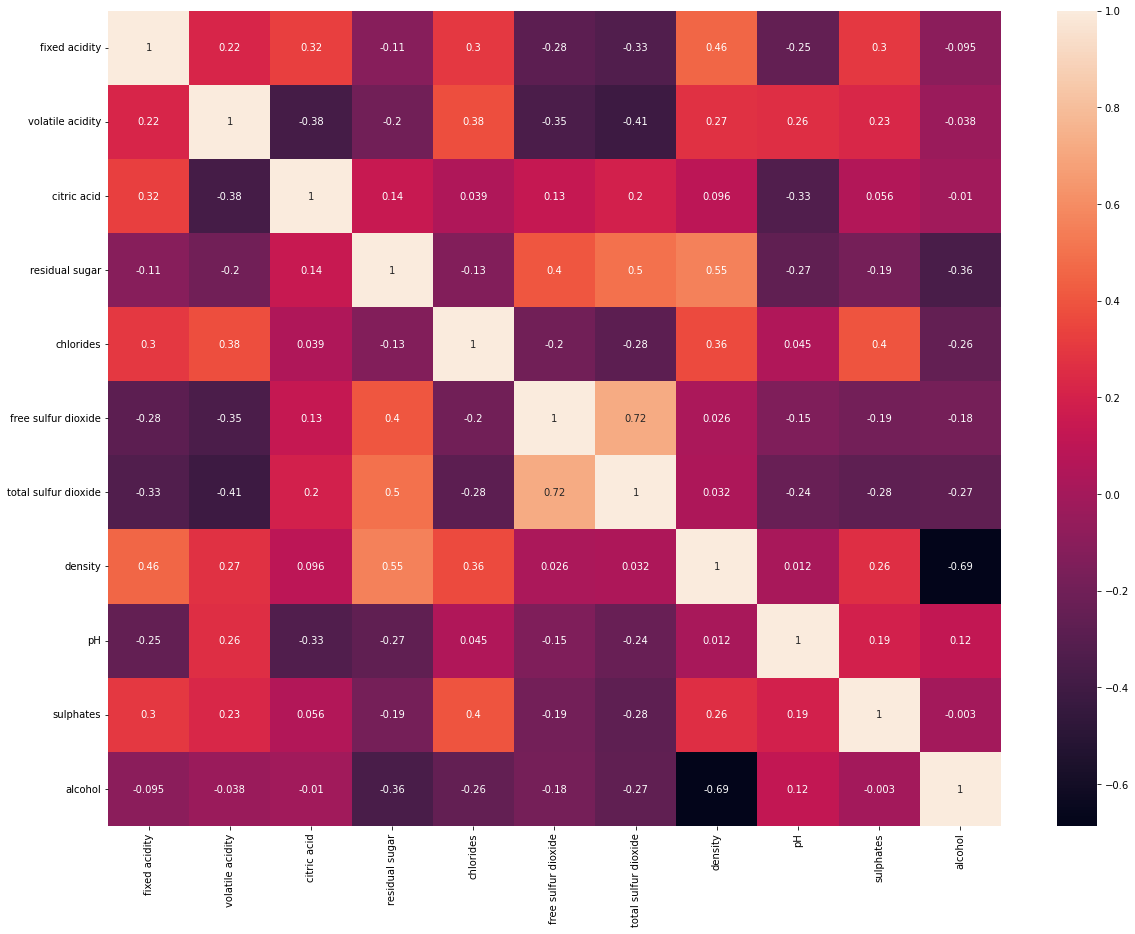

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(wine.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

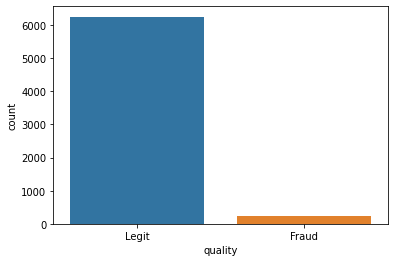

In [8]:
sns.countplot(x='quality',data=wine)

<AxesSubplot:xlabel='quality', ylabel='count'>

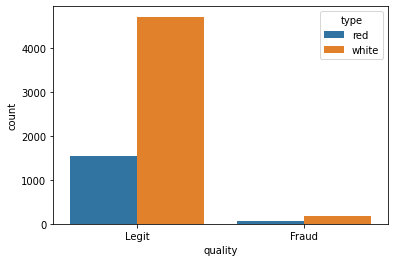

In [9]:
sns.countplot(x='quality', hue='type',data=wine)

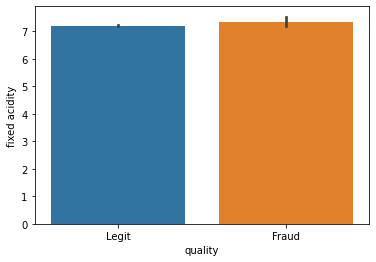

In [10]:
sns.barplot(x='quality',y='fixed acidity',data=wine)
plt.show()

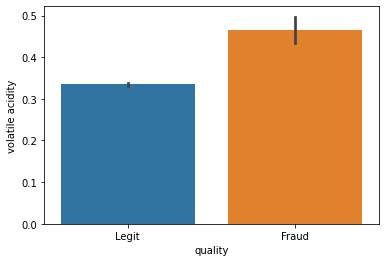

In [11]:
sns.barplot(x='quality',y='volatile acidity',data=wine)
plt.show()

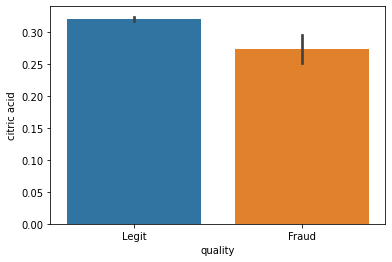

In [12]:
sns.barplot(x='quality',y='citric acid',data=wine)
plt.show()

In [13]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red


In [14]:
pd.get_dummies(wine.quality)

,Fraud,Legit
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
6492,0,1
6493,0,1
6494,0,1
6495,0,1


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
wine_encode=wine
wine_encode.quality=le.fit_transform(wine_encode.quality)
wine_encode.type=le.fit_transform(wine_encode.type)
wine_encode

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [17]:

(wine_encode.corr()['quality'][0:-2])


fixed acidity          -0.021794
volatile acidity       -0.151228
citric acid             0.061789
residual sugar          0.048756
chlorides              -0.034499
free sulfur dioxide     0.085204
total sulfur dioxide    0.035252
density                -0.016351
pH                     -0.020107
sulphates               0.034046
alcohol                 0.051141
Name: quality, dtype: float64

<AxesSubplot:xlabel='volatile acidity', ylabel='pH'>

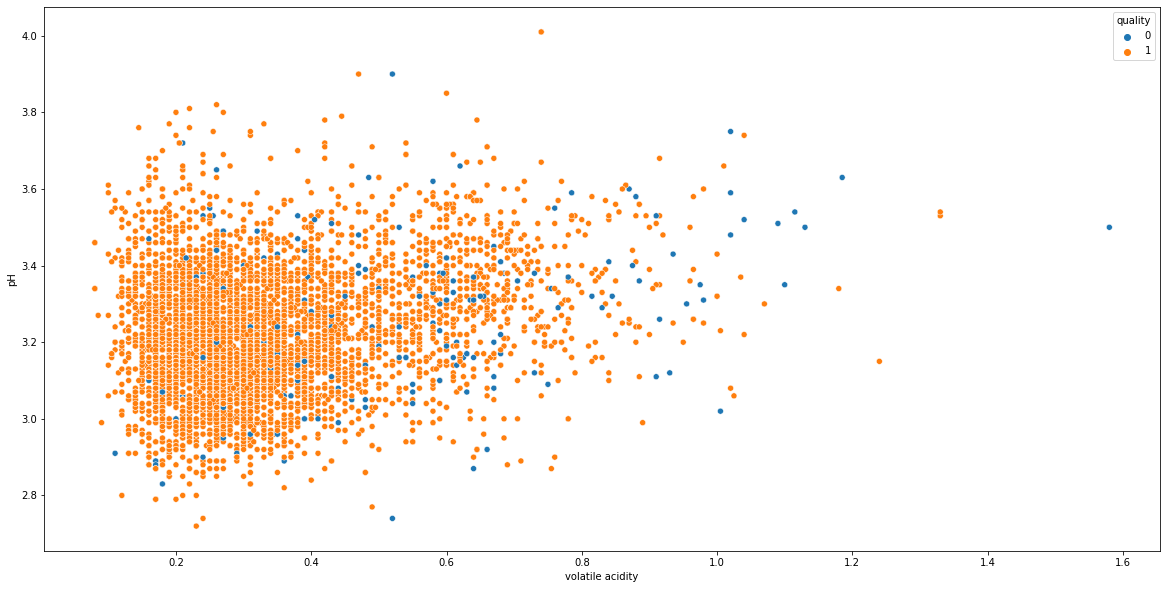

In [18]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='volatile acidity',y='pH',hue='quality',data=wine_encode)

<AxesSubplot:xlabel='density', ylabel='pH'>

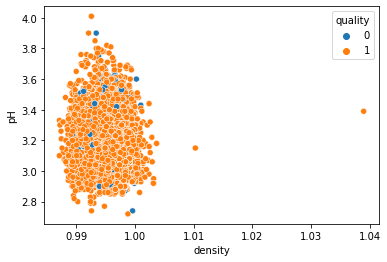

In [19]:
sns.scatterplot(x='density',y='pH',hue='quality',data=wine_encode)

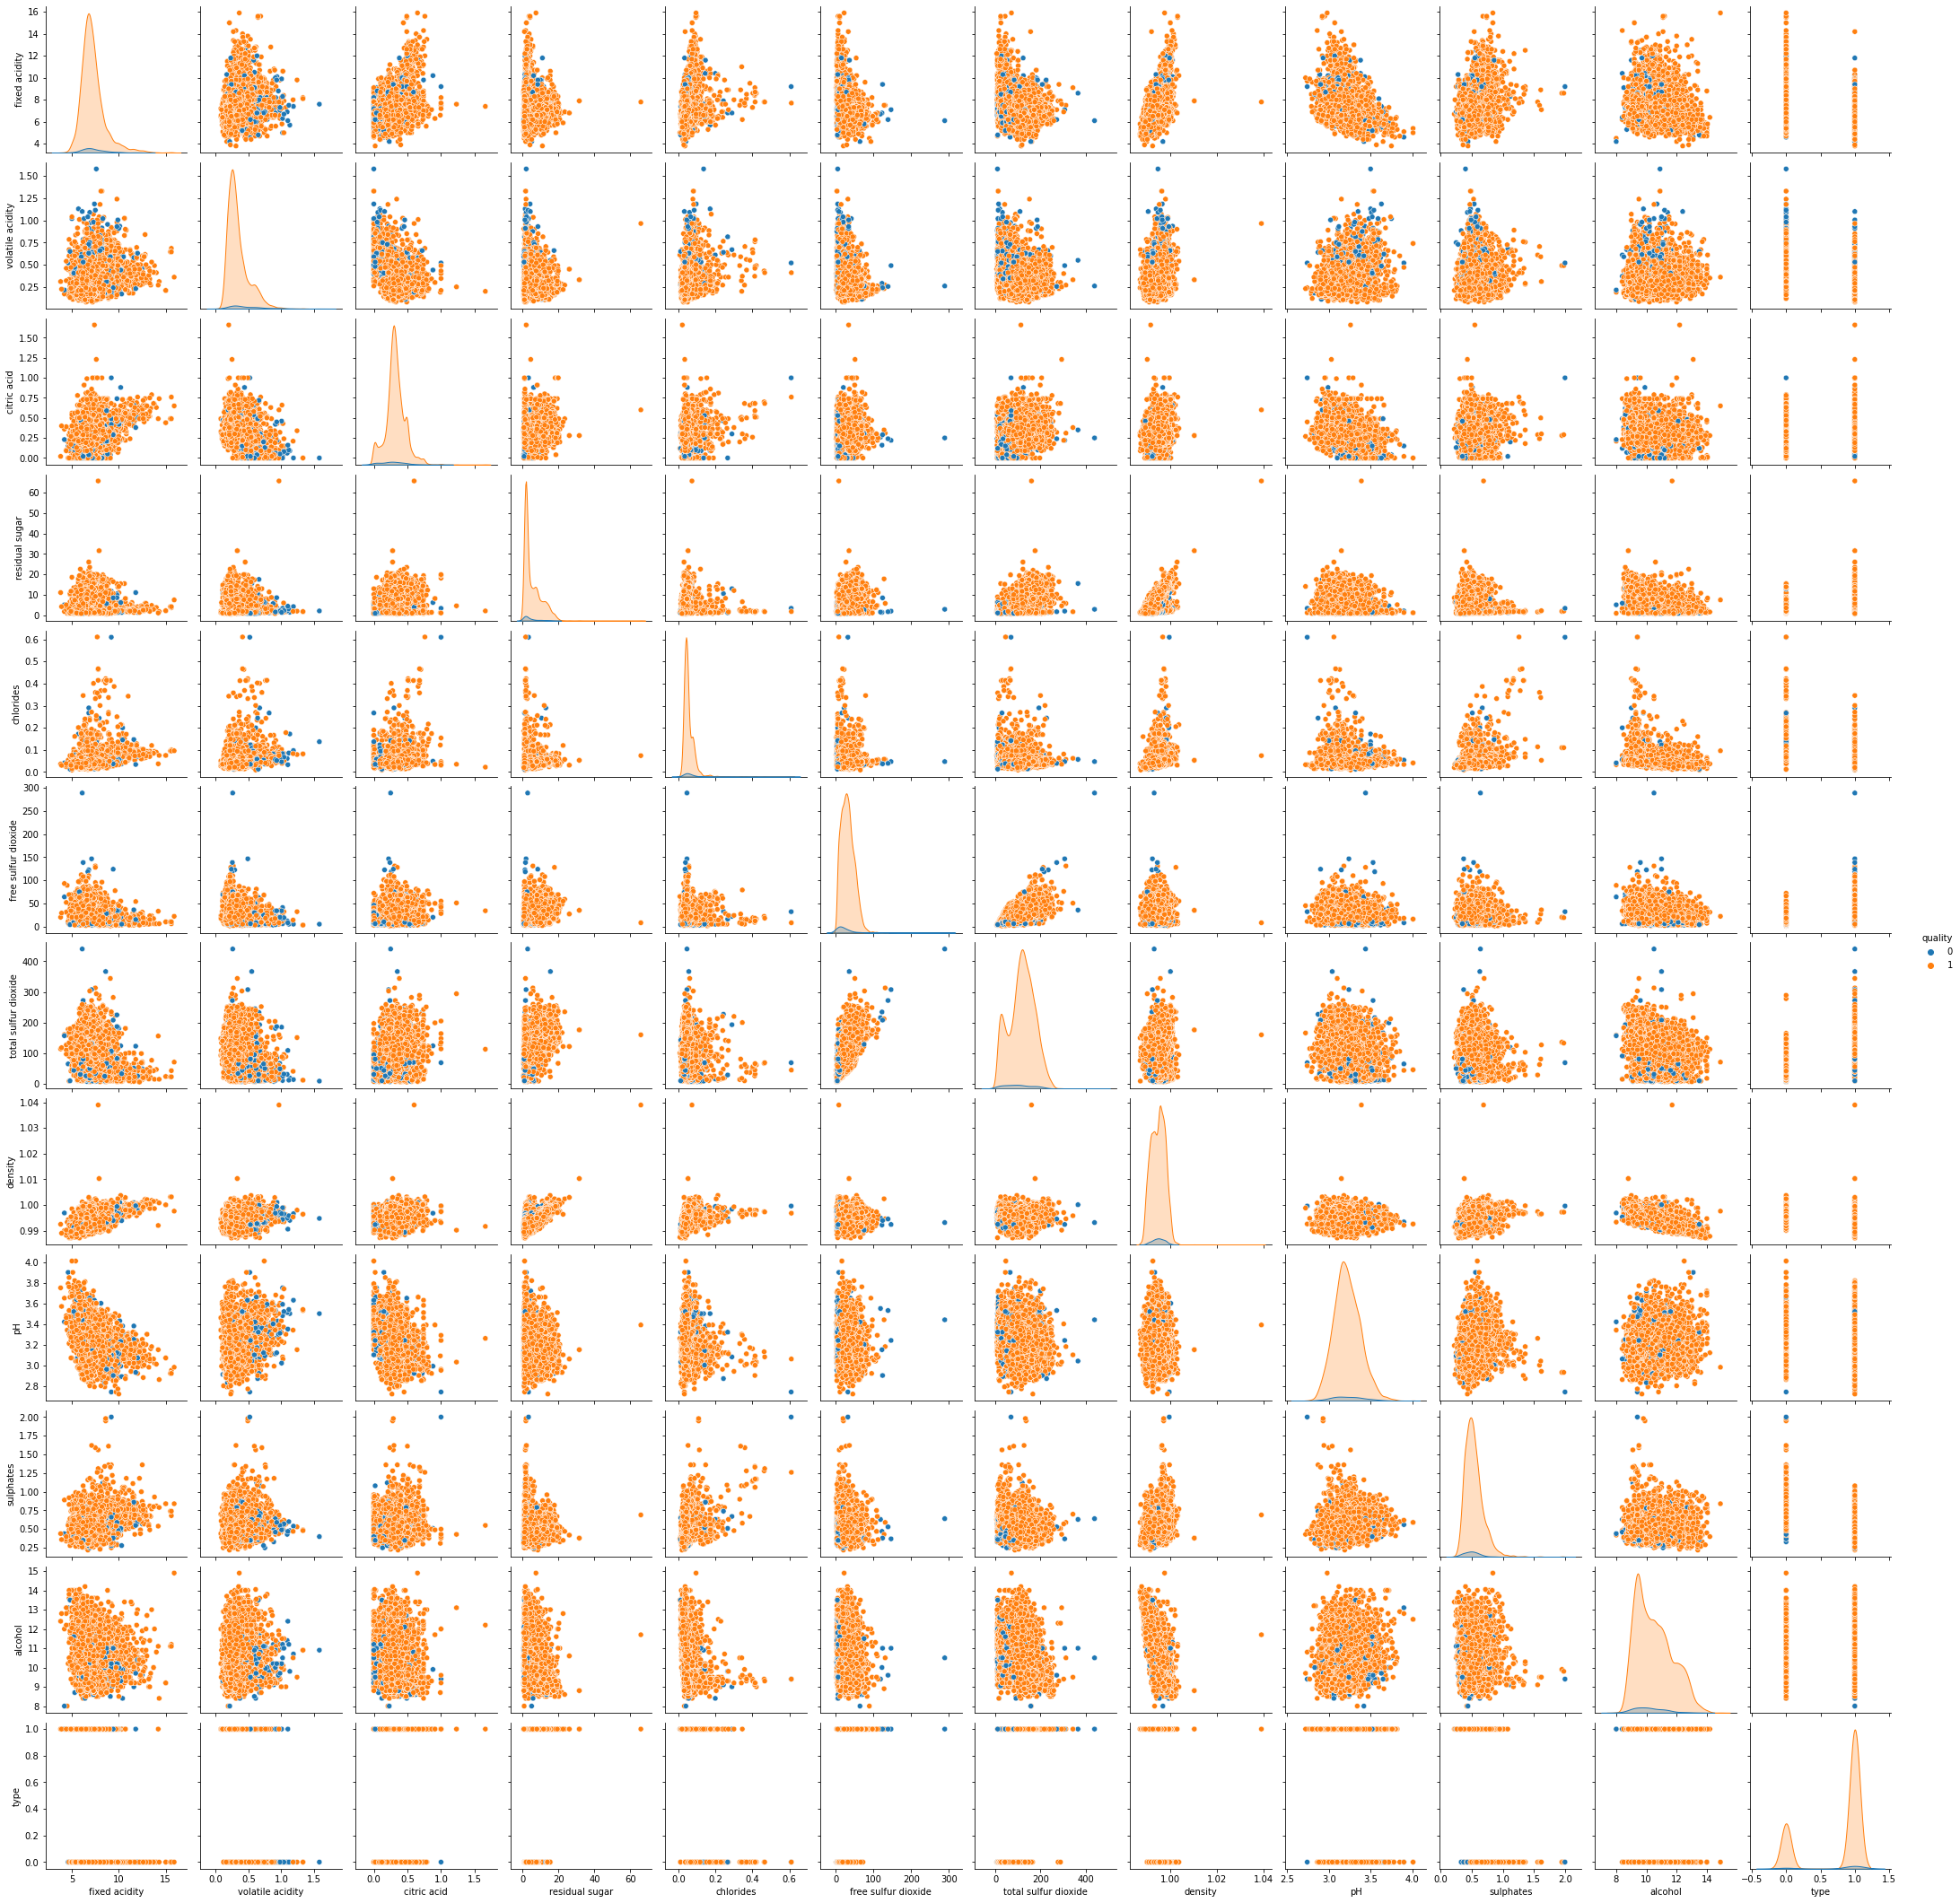

In [20]:
sns.pairplot(wine_encode,hue='quality')

In [21]:
def plot_svm_boundary (model,X,y):
    X=X.values
    y=y.values


    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='seismic')

# plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

# create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
    ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
     )
# plot support vectors
    ax.scatter(
    model.support_vectors_[:, 0],
    model.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
            )
plt.show()

In [22]:
from sklearn.svm import SVC
help(SVC)
X=wine_encode.drop(['quality','type'],axis=1)
y=wine_encode['quality']

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
X_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3761,9.9,0.490,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.400000
3740,7.7,0.280,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.600000
1359,11.6,0.475,0.40,1.4,0.091,6.0,28.0,0.99704,3.07,0.65,10.033333
1230,7.7,0.180,0.34,2.7,0.066,15.0,58.0,0.99470,3.37,0.78,11.800000
4751,7.6,0.250,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.100000


In [25]:
X_test.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.9942,3.26,0.38,12.2
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.9956,3.27,0.45,9.9


In [26]:
y_train.head(5)

3761    1
3740    1
1359    1
1230    1
4751    1
Name: quality, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)

X_scaled_test = scaler.transform(X_test)
X_scaled_train

array([[ 2.09749415e+00,  9.44541345e-01, -6.19125220e-01, ...,
        -2.78980003e+00, -6.07582024e-01, -9.09141702e-01],
       [ 3.88772797e-01, -3.53027559e-01,  2.06940277e-01, ...,
         3.30043338e-01, -1.99847169e-01, -7.41998353e-01],
       [ 3.41786974e+00,  8.51857852e-01,  5.51134235e-01, ...,
        -9.17894009e-01,  8.19489967e-01, -3.79854429e-01],
       ...,
       [-6.20926184e-01,  2.03073400e-01, -8.25641595e-01, ...,
         1.42852736e-01, -6.75537833e-01, -8.25570027e-01],
       [-5.43257032e-01, -4.76605550e-01,  1.23952215e+00, ...,
        -2.31528468e-01, -4.03714597e-01, -8.25570027e-01],
       [ 4.27035147e-04,  1.74779829e+00, -1.78938468e+00, ...,
         1.82756815e+00,  7.19760670e-02, -8.25570027e-01]])

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC(class_weight='balanced') 
from sklearn.model_selection import GridSearchCV

svc.fit(X_train,y_train)
param_grid={'C':[0.001,0.01,0.5,1],'gamma':['scaled','auto'],'kernel':['linear','rbf']}
grid=GridSearchCV(svc,param_grid)
grid.fit(X_scaled_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py", line 207, in fit
    "'auto'. Got '{}' instead.".format(self.gamma)
ValueError: When 'gamma' is a string, it should be either 'scale' or 'auto'. Got 'scaled' instead.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validati

Model accuracy : 0.6621


In [29]:
linear_svc=SVC(kernel='linear', C=1.0) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.9600


In [30]:
linear_svc=SVC(kernel='rbf', C=1) 
linear_svc.fit(X_train,y_train)

y_pred_test=linear_svc.predict(X_test)

print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

C=1.0 Model accuracy with linear kernel : 0.9600
